# <span style="color:royalblue"> [9주차] 2024 벌집순환모형 이론 실전 코드</span>
# 벌집순환모형 이론 기반 주택시장 가격 및 거래량 데이터 분석 

--- 

# [국토연구] 한국 주택시장과 벌집순환모형의 관련성에 관한 연구

- 벌집순환모형(Honeycomb cycle)은 주택가격과 거래량의 변화 추이를 통해 현재 주택경기가 주기상 어느 단계에 있는지 파악하는 분석기법</br>
- 가로축에는 거래량, 세로축에는 가격이 표시된다. 주택가격과 거래량의 교점이 주택경기를 나타낸다.

![벌집](./벌집.png)

[벌집순환모형 설명 블로그](https://m.blog.naver.com/haksengyo/221146660599)

[KOSIS 행정구역별 아파트매매거래현황](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0064&vw_cd=MT_ZTITLE&list_id=408_31503_004&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

[KOSIS 아파트 매매가격지수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20161E&vw_cd=MT_GTITLE01&list_id=107&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trading_vol = pd.read_csv('행정구역별_아파트매매거래현황_20240131201532.csv', encoding='cp949', header=[1])
price = pd.read_csv('아파트매매가격지수_시도_시_군_구__20240131203822.csv', encoding='cp949')

In [3]:
trading_vol

,시점,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,(구)제주,제주특별자치도
0,2006.01,12300,2496,430,428,435,255,308,297,-,4347,370,488,399,326,291,394,871,165,-
1,2006.02,40606,7368,2061,2097,2212,1982,1423,1008,-,11694,999,2066,1264,1431,865,1860,2028,248,-
2,2006.03,64920,12843,3117,2784,3768,3653,1676,1605,-,20010,1718,2199,2394,2131,1183,2685,2936,218,-
3,2006.04,59826,11733,3231,2404,3772,3138,1510,1773,-,18457,1289,1427,1902,2512,1129,2493,2892,164,-
4,2006.05,58509,11695,3450,2097,3893,2308,1385,1939,-,19198,1304,1437,1850,1744,1186,2254,2592,177,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2023.07,36260,3804,2251,2041,2275,1377,1079,1141,349,9795,1316,1608,2035,1427,1141,1890,2553,-,178
211,2023.08,39277,4091,2547,2159,2438,1391,1273,1120,370,10319,1487,1765,2213,1546,1477,2077,2799,-,205
212,2023.09,37629,3845,2400,2236,2343,1335,1271,1126,423,10076,1579,1583,2019,1448,1186,1927,2638,-,194
213,2023.10,35454,2983,2384,2083,2132,1233,1206,1089,388,8242,1520,1896,2075,1476,1419,2349,2796,-,183


In [4]:
price 

,시점,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2003.11,55.4,52.5,54.7,51.7,53.9,53.6,52.9,51.0,-,52.5,67.2,60.7,71.0,56.9,59.1,67.7,65.0,53.6
1,2003.12,55.1,52.1,54.2,51.2,53.6,53.3,52.3,50.6,-,52.3,67.5,60.6,70.9,57.0,59.1,67.6,64.7,53.5
2,2004.01,55.0,51.9,54.1,51.0,53.4,53.2,52.5,50.6,-,52.1,67.8,60.7,71.0,57.0,59.0,67.3,64.6,53.6
3,2004.02,55.1,52.2,54.1,51.1,53.5,53.4,53.0,50.7,-,52.1,68.5,61.0,72.0,57.3,58.9,67.4,64.8,53.5
4,2004.03,55.4,52.5,54.2,51.3,53.6,53.5,53.3,51.1,-,52.3,69.1,61.3,72.8,57.8,58.7,67.6,65.1,53.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2023.08,93.0,93.4,91.0,80.8,91.3,96.0,89.6,91.2,76.3,91.6,102.2,100.4,99.1,100.9,93.2,98.4,95.8,103.0
238,2023.09,93.3,93.9,90.9,81.0,91.6,96.0,89.9,91.4,76.7,92.2,102.5,100.8,99.2,101.0,93.2,98.7,95.9,102.8
239,2023.10,93.5,94.2,90.8,81.1,91.8,96.1,90.2,91.6,76.7,92.7,102.8,101.3,99.2,101.0,93.1,99.0,95.9,102.7
240,2023.11,93.6,94.4,90.6,81.1,91.6,96.1,90.3,91.6,76.7,92.8,103.0,101.5,99.3,101.2,93.0,99.0,95.9,102.6


In [5]:
trading_vol.columns

Index(['시점', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '(구)제주', '제주특별자치도'],
      dtype='object')

In [6]:
price.columns

Index(['시점', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'],
      dtype='object')

In [7]:
# (구)제주 값에 다가  (구)제주 값이 하이픈(-)인 부분에 "제주특별자치도" 값을 넣는다. 그렇지 않은 부분은 (구)제주 그대로.
trading_vol['(구)제주'] = np.where(trading_vol['(구)제주']=='-',trading_vol['제주특별자치도'], trading_vol['(구)제주'])

In [8]:
trading_vol = trading_vol.drop('제주특별자치도', axis=1)

In [9]:
price.columns = ['시점', '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
                 '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

trading_vol.columns = price.columns

In [10]:
trading_vol.columns = [s + '_거래량' for s in trading_vol.columns]
price.columns = [s + '_가격' for s in price.columns]

In [11]:
print('거래량', trading_vol.columns, end="")
print("\n")
print('가격', price.columns, end="")

거래량 Index(['시점_거래량', '전국_거래량', '서울_거래량', '부산_거래량', '대구_거래량', '인천_거래량', '광주_거래량',
       '대전_거래량', '울산_거래량', '세종_거래량', '경기_거래량', '강원_거래량', '충북_거래량', '충남_거래량',
       '전북_거래량', '전남_거래량', '경북_거래량', '경남_거래량', '제주_거래량'],
      dtype='object')

가격 Index(['시점_가격', '전국_가격', '서울_가격', '부산_가격', '대구_가격', '인천_가격', '광주_가격', '대전_가격',
       '울산_가격', '세종_가격', '경기_가격', '강원_가격', '충북_가격', '충남_가격', '전북_가격', '전남_가격',
       '경북_가격', '경남_가격', '제주_가격'],
      dtype='object')

In [12]:
df = pd.merge_asof(trading_vol, price, left_on='시점_거래량', right_on='시점_가격')

In [13]:
df

,시점_거래량,전국_거래량,서울_거래량,부산_거래량,대구_거래량,인천_거래량,광주_거래량,대전_거래량,울산_거래량,세종_거래량,...,세종_가격,경기_가격,강원_가격,충북_가격,충남_가격,전북_가격,전남_가격,경북_가격,경남_가격,제주_가격
0,2006.01,12300,2496,430,428,435,255,308,297,-,...,-,54.3,75.7,69.5,75.1,62.9,59.5,73.4,69.2,52.9
1,2006.02,40606,7368,2061,2097,2212,1982,1423,1008,-,...,-,54.8,76.2,70.2,75.5,63.2,59.5,73.8,69.3,52.9
2,2006.03,64920,12843,3117,2784,3768,3653,1676,1605,-,...,-,55.4,76.8,71.1,75.5,63.7,59.5,74.6,69.5,52.9
3,2006.04,59826,11733,3231,2404,3772,3138,1510,1773,-,...,-,56.2,77.1,71.7,75.6,64.2,59.5,75.4,69.6,52.9
4,2006.05,58509,11695,3450,2097,3893,2308,1385,1939,-,...,-,57.5,77.3,71.8,75.6,64.8,59.6,76.4,69.8,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2023.07,36260,3804,2251,2041,2275,1377,1079,1141,349,...,76.1,91.1,102.1,100.3,99.0,100.9,93.4,98.1,95.8,103.1
211,2023.08,39277,4091,2547,2159,2438,1391,1273,1120,370,...,76.3,91.6,102.2,100.4,99.1,100.9,93.2,98.4,95.8,103.0
212,2023.09,37629,3845,2400,2236,2343,1335,1271,1126,423,...,76.7,92.2,102.5,100.8,99.2,101.0,93.2,98.7,95.9,102.8
213,2023.10,35454,2983,2384,2083,2132,1233,1206,1089,388,...,76.7,92.7,102.8,101.3,99.2,101.0,93.1,99.0,95.9,102.7


In [14]:
df.columns

Index(['시점_거래량', '전국_거래량', '서울_거래량', '부산_거래량', '대구_거래량', '인천_거래량', '광주_거래량',
       '대전_거래량', '울산_거래량', '세종_거래량', '경기_거래량', '강원_거래량', '충북_거래량', '충남_거래량',
       '전북_거래량', '전남_거래량', '경북_거래량', '경남_거래량', '제주_거래량', '시점_가격', '전국_가격',
       '서울_가격', '부산_가격', '대구_가격', '인천_가격', '광주_가격', '대전_가격', '울산_가격', '세종_가격',
       '경기_가격', '강원_가격', '충북_가격', '충남_가격', '전북_가격', '전남_가격', '경북_가격', '경남_가격',
       '제주_가격'],
      dtype='object')

In [15]:
df_seoul = df[['시점_거래량','서울_거래량','서울_가격']]

In [16]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점_거래량  215 non-null    float64
 1   서울_거래량  215 non-null    int64  
 2   서울_가격   215 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


In [17]:
# 시점을 수정된 날짜로 재조정
df_seoul = df_seoul.copy()
df_seoul['연도']= df_seoul.loc[:,'시점_거래량'].astype(str).str.split('.', expand=True)[0]
df_seoul['월']= df_seoul.loc[:,'시점_거래량'].astype(str).str.split('.', expand=True)[1]
df_seoul['시점_거래량'] = df_seoul['연도'] + "-" + df_seoul['월']
df_seoul['월'] = df_seoul['월'].replace("1", "10")

In [18]:
df_seoul.head(12)

,시점_거래량,서울_거래량,서울_가격,연도,월
0,2006-01,2496,56.4,2006,01
1,2006-02,7368,57.0,2006,02
2,2006-03,12843,57.9,2006,03
3,2006-04,11733,59.2,2006,04
4,2006-05,11695,60.3,2006,05
5,2006-06,8198,60.7,2006,06
6,2006-07,6374,60.9,2006,07
7,2006-08,7053,61.1,2006,08
8,2006-09,13228,61.6,2006,09
9,2006-1,19649,62.9,2006,10


In [19]:
df_seoul['시점_거래량'] = df_seoul['연도'] + "-" + df_seoul['월']
df_seoul['시점_거래량'] = pd.to_datetime(df_seoul['시점_거래량'].astype(str), format='%Y-%m')

In [20]:
df_seoul['시점_거래량'].head(12)

0    2006-01-01
1    2006-02-01
2    2006-03-01
3    2006-04-01
4    2006-05-01
5    2006-06-01
6    2006-07-01
7    2006-08-01
8    2006-09-01
9    2006-10-01
10   2006-11-01
11   2006-12-01
Name: 시점_거래량, dtype: datetime64[ns]

In [21]:
df_1 = df_seoul.iloc[-28:,:3]

In [22]:
import matplotlib.pyplot as plt
import datetime as dt
types = df_1['시점_거래량'].dt.strftime('%Y-%m')
x_coords = df_1['서울_거래량']
y_coords = df_1['서울_가격']

In [66]:
x_coords

187    5054
188    3874
189    2839
190    2305
191    1634
192    1281
193    1404
194    1236
195    1624
196    2372
197    2014
198    1028
199     907
200     856
201     900
202     761
203    1001
204    1161
205    2286
206    3234
207    2981
208    3711
209    4136
210    3804
211    4091
212    3845
213    2983
214    2417
Name: 서울_거래량, dtype: int64

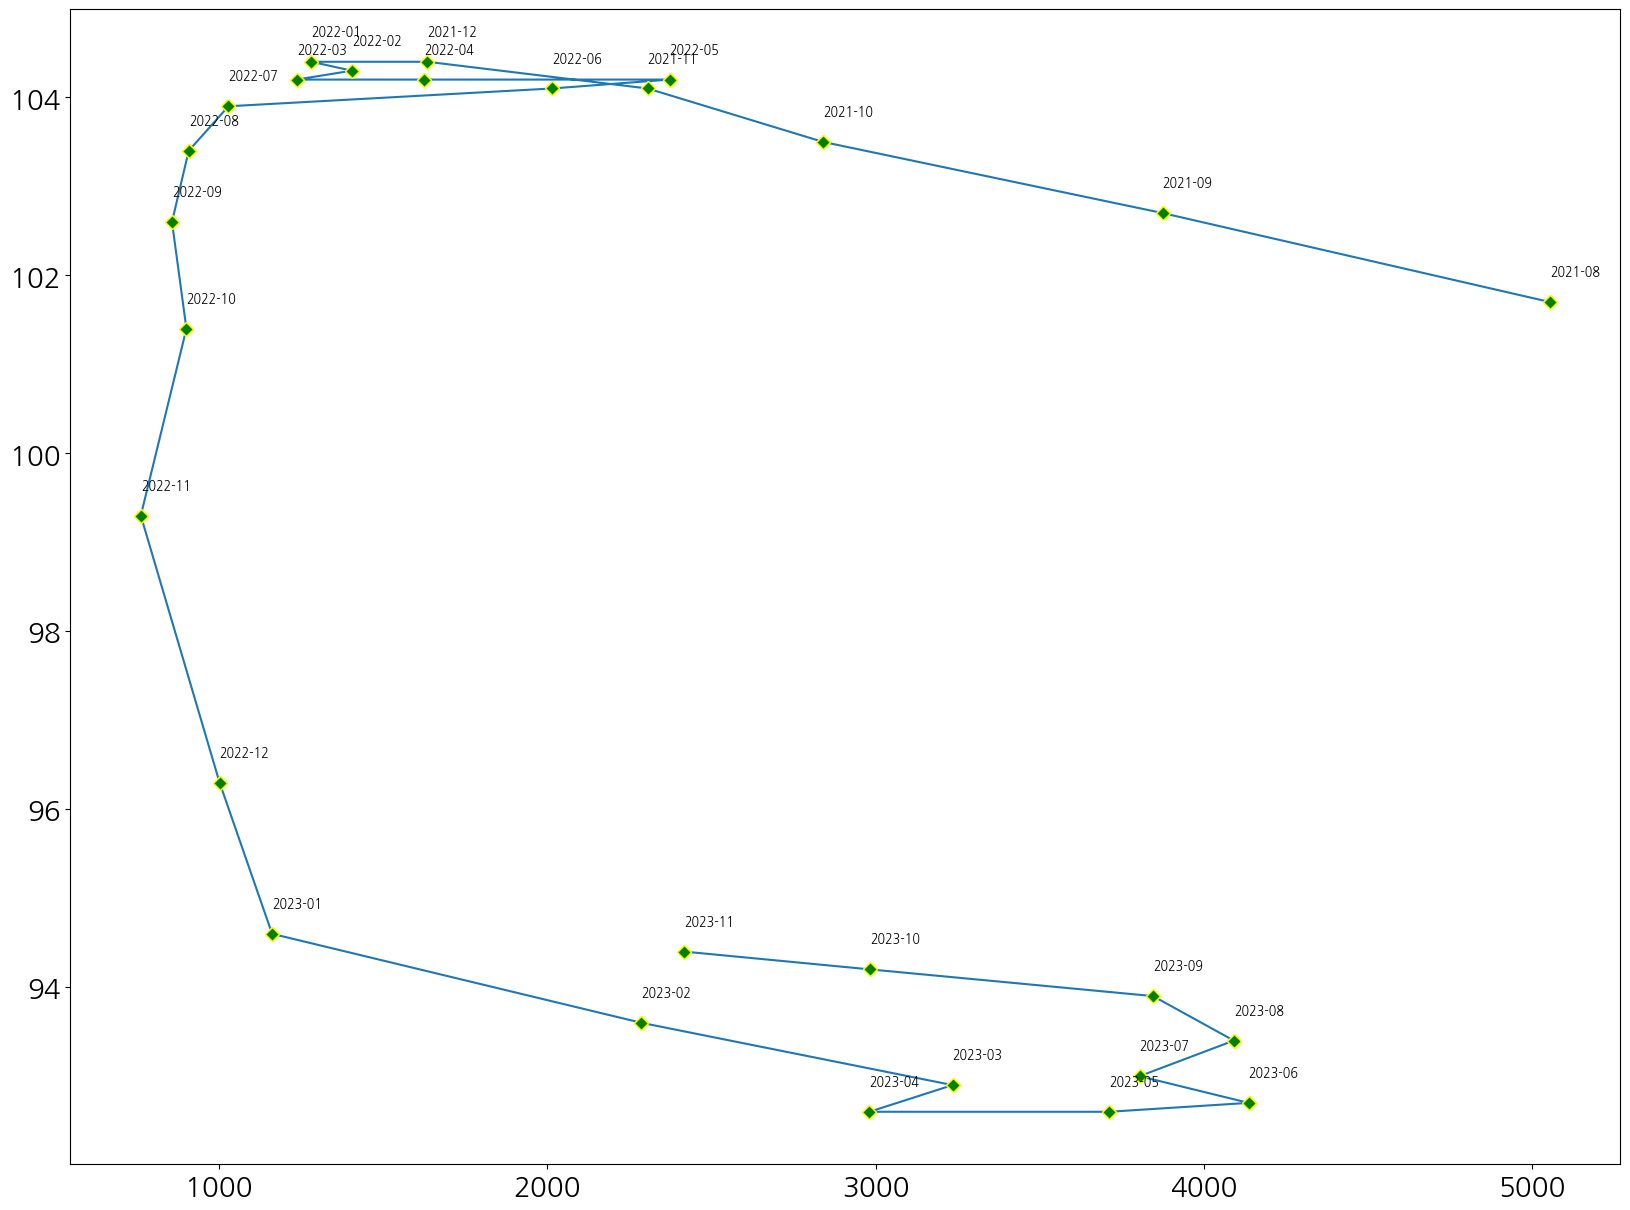

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 15)
plt.rc('font', family = 'NanumGothic')
plt.rcParams['font.size'] = 20


x = list(df_1['서울_거래량'])
y = list(df_1['서울_가격'])
types = df_1['시점_거래량'].dt.strftime('%Y-%m')

# texts = df_1['시점_거래량'].dt.strftime('%Y-%m')

plt.plot(x, y, marker='D', mfc='green', mec='yellow',ms='7')

# for i,text in enumerate(texts):
#     x = list(x_coords)[i]
#     y = list(y_coords)[i]  
#     plt.text(x+0.5, y+0.5, text, fontsize=12)
    
    
for i,type in enumerate(types):
    x = list(x_coords)[i]
    y = list(y_coords)[i]
    
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.plot(x, y,marker='D', mfc='green', mec='yellow',ms='7')
    
plt.show()

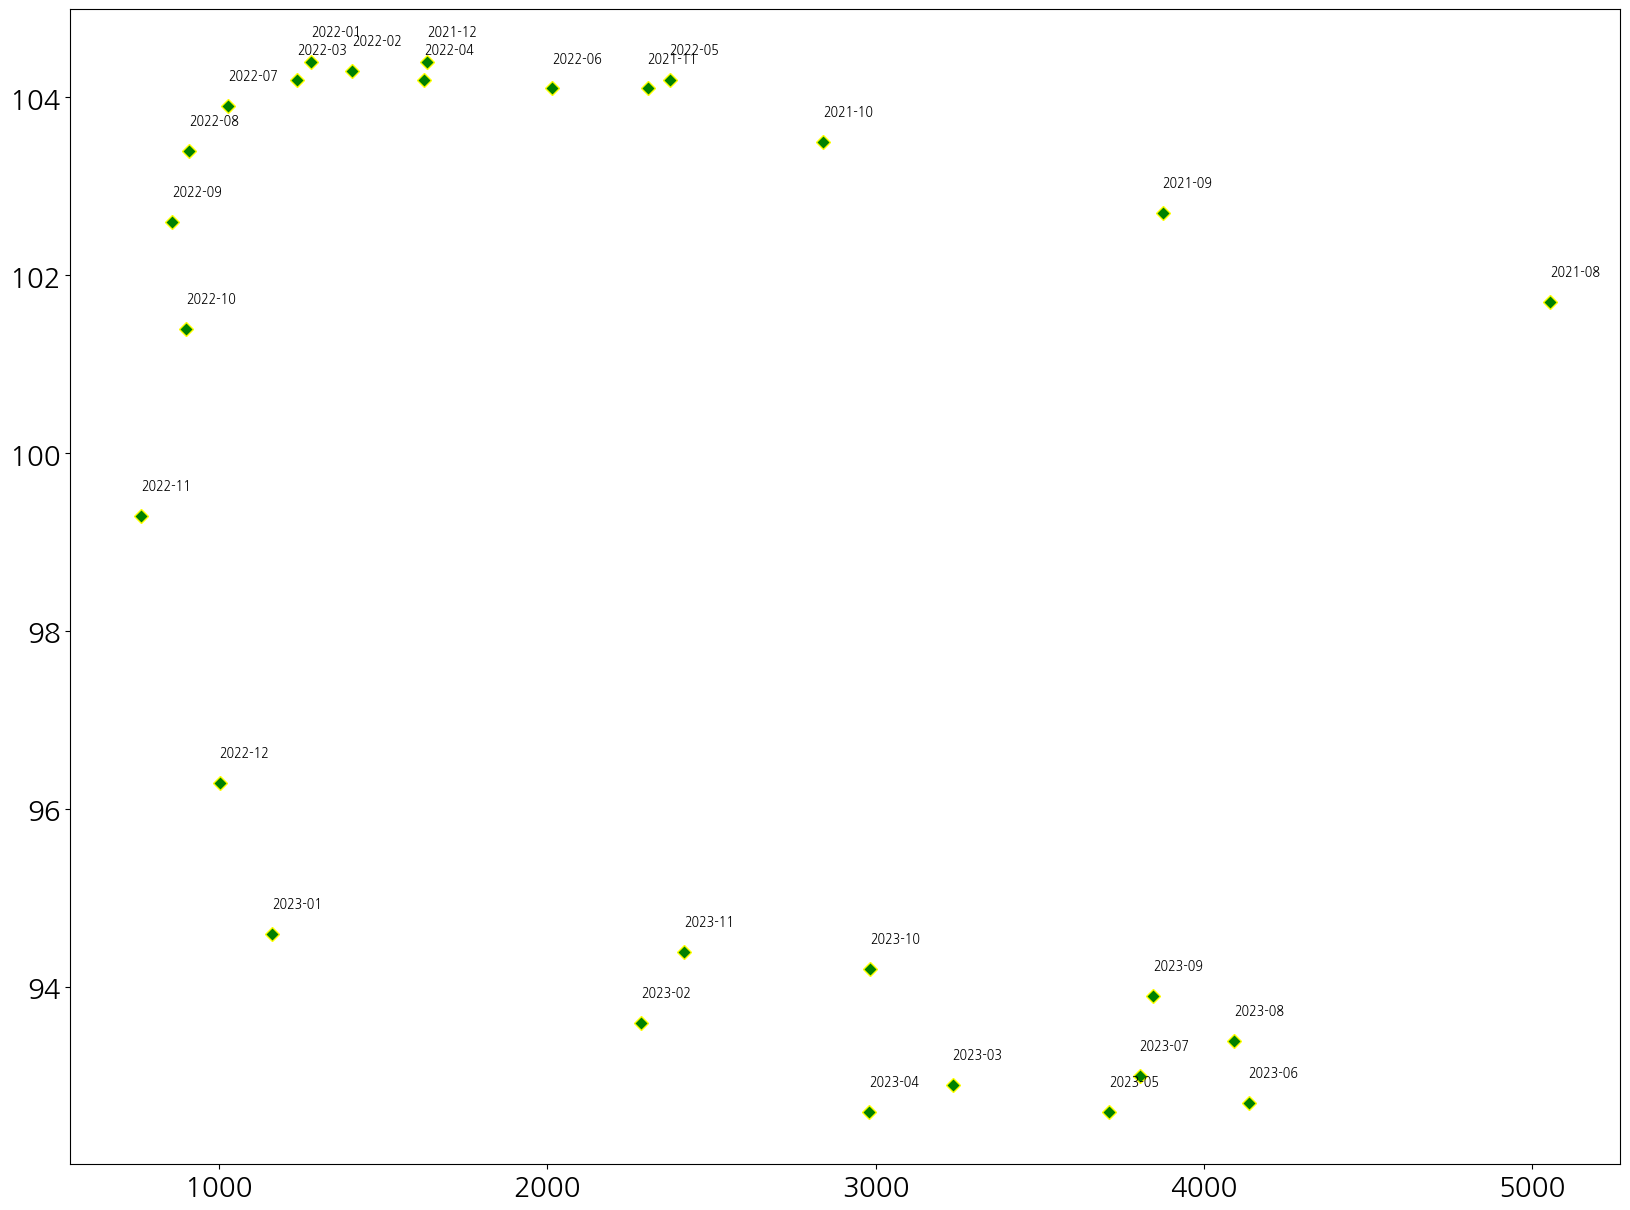

In [45]:
for i,type in enumerate(types):
    x = list(x_coords)[i]
    y = list(y_coords)[i]
    
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.plot(x, y,marker='D', mfc='green', mec='yellow',ms='7')

plt.show()

In [46]:
df_1

,시점_거래량,서울_거래량,서울_가격
187,2021-08-01,5054,101.7
188,2021-09-01,3874,102.7
189,2021-10-01,2839,103.5
190,2021-11-01,2305,104.1
191,2021-12-01,1634,104.4
192,2022-01-01,1281,104.4
193,2022-02-01,1404,104.3
194,2022-03-01,1236,104.2
195,2022-04-01,1624,104.2
196,2022-05-01,2372,104.2


--------

# 2. 소비자 물가지수에 따른 주택가격지수 보정

[소비자 물가지수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J22003&vw_cd=MT_ZTITLE&list_id=P2_6&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do)

In [47]:
# 소비자 물가지수
cpi = pd.read_csv('소비자물가지수_2020100__20240131203526.csv', encoding ='cp949')

In [48]:
cpi

,시점,전국
0,1965.01,2.493
1,1965.02,2.548
2,1965.03,2.553
3,1965.04,2.593
4,1965.05,2.645
...,...,...
703,2023.08,112.280
704,2023.09,112.830
705,2023.10,113.260
706,2023.11,112.670


In [49]:
cpi[(cpi['전국']>99) & (cpi['전국']<101)]

,시점,전국
643,2018.08,99.462
644,2018.09,100.221
645,2018.10,100.041
646,2018.11,99.330
649,2019.02,99.311
650,2019.03,99.121
651,2019.04,99.481
652,2019.05,99.652
653,2019.06,99.491
654,2019.07,99.187


In [50]:
df

,시점_거래량,전국_거래량,서울_거래량,부산_거래량,대구_거래량,인천_거래량,광주_거래량,대전_거래량,울산_거래량,세종_거래량,...,세종_가격,경기_가격,강원_가격,충북_가격,충남_가격,전북_가격,전남_가격,경북_가격,경남_가격,제주_가격
0,2006.01,12300,2496,430,428,435,255,308,297,-,...,-,54.3,75.7,69.5,75.1,62.9,59.5,73.4,69.2,52.9
1,2006.02,40606,7368,2061,2097,2212,1982,1423,1008,-,...,-,54.8,76.2,70.2,75.5,63.2,59.5,73.8,69.3,52.9
2,2006.03,64920,12843,3117,2784,3768,3653,1676,1605,-,...,-,55.4,76.8,71.1,75.5,63.7,59.5,74.6,69.5,52.9
3,2006.04,59826,11733,3231,2404,3772,3138,1510,1773,-,...,-,56.2,77.1,71.7,75.6,64.2,59.5,75.4,69.6,52.9
4,2006.05,58509,11695,3450,2097,3893,2308,1385,1939,-,...,-,57.5,77.3,71.8,75.6,64.8,59.6,76.4,69.8,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2023.07,36260,3804,2251,2041,2275,1377,1079,1141,349,...,76.1,91.1,102.1,100.3,99.0,100.9,93.4,98.1,95.8,103.1
211,2023.08,39277,4091,2547,2159,2438,1391,1273,1120,370,...,76.3,91.6,102.2,100.4,99.1,100.9,93.2,98.4,95.8,103.0
212,2023.09,37629,3845,2400,2236,2343,1335,1271,1126,423,...,76.7,92.2,102.5,100.8,99.2,101.0,93.2,98.7,95.9,102.8
213,2023.10,35454,2983,2384,2083,2132,1233,1206,1089,388,...,76.7,92.7,102.8,101.3,99.2,101.0,93.1,99.0,95.9,102.7


In [51]:
# df.merge_asof(df, cpi)
df_c = pd.merge_asof(df, cpi, left_on='시점_거래량', right_on='시점')

In [52]:
df_c = df_c[['시점_거래량','서울_거래량','서울_가격','전국']]

In [53]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점_거래량  215 non-null    float64
 1   서울_거래량  215 non-null    int64  
 2   서울_가격   215 non-null    float64
 3   전국      215 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.8 KB


In [54]:
# 시점을 수정된 날짜로 재조정
df_c = df_c.copy()
df_c['연도']= df_c.loc[:,'시점_거래량'].astype(str).str.split('.', expand=True)[0]
df_c['월']= df_c.loc[:,'시점_거래량'].astype(str).str.split('.', expand=True)[1]
df_c['월'] = df_c['월'].replace("1", "10")

df_c['시점_거래량'] = df_c['연도'] + "-" + df_c['월']

In [55]:
df_c

,시점_거래량,서울_거래량,서울_가격,전국,연도,월
0,2006-01,2496,56.4,75.231,2006,01
1,2006-02,7368,57.0,75.381,2006,02
2,2006-03,12843,57.9,75.827,2006,03
3,2006-04,11733,59.2,75.902,2006,04
4,2006-05,11695,60.3,76.050,2006,05
...,...,...,...,...,...,...
210,2023-07,3804,93.0,111.290,2023,07
211,2023-08,4091,93.4,112.280,2023,08
212,2023-09,3845,93.9,112.830,2023,09
213,2023-10,2983,94.2,113.260,2023,10


In [56]:
base_point = np.float32(df_c['전국'][df_c['시점_거래량']=='2020-01'])
base_point

array([100.09], dtype=float32)

In [57]:
df_c['cpi(2020.1=100)'] = base_point / df_c['전국'] * 100

In [58]:
df_c

,시점_거래량,서울_거래량,서울_가격,전국,연도,월,cpi(2020.1=100)
0,2006-01,2496,56.4,75.231,2006,01,133.043554
1,2006-02,7368,57.0,75.381,2006,02,132.778812
2,2006-03,12843,57.9,75.827,2006,03,131.997832
3,2006-04,11733,59.2,75.902,2006,04,131.867403
4,2006-05,11695,60.3,76.050,2006,05,131.610778
...,...,...,...,...,...,...,...
210,2023-07,3804,93.0,111.290,2023,07,89.936199
211,2023-08,4091,93.4,112.280,2023,08,89.143210
212,2023-09,3845,93.9,112.830,2023,09,88.708674
213,2023-10,2983,94.2,113.260,2023,10,88.371884


In [59]:
df_c['시점_거래량'] = pd.to_datetime(df_c['시점_거래량'].astype(str), format='%Y-%m')

In [60]:
 df_c['가격_보정'] = df_c['서울_가격'] * df_c['cpi(2020.1=100)']

In [61]:
df_c

,시점_거래량,서울_거래량,서울_가격,전국,연도,월,cpi(2020.1=100),가격_보정
0,2006-01-01,2496,56.4,75.231,2006,01,133.043554,7503.656463
1,2006-02-01,7368,57.0,75.381,2006,02,132.778812,7568.392289
2,2006-03-01,12843,57.9,75.827,2006,03,131.997832,7642.674493
3,2006-04-01,11733,59.2,75.902,2006,04,131.867403,7806.550266
4,2006-05-01,11695,60.3,76.050,2006,05,131.610778,7936.129887
...,...,...,...,...,...,...,...,...
210,2023-07-01,3804,93.0,111.290,2023,07,89.936199,8364.066546
211,2023-08-01,4091,93.4,112.280,2023,08,89.143210,8325.975826
212,2023-09-01,3845,93.9,112.830,2023,09,88.708674,8329.744444
213,2023-10-01,2983,94.2,113.260,2023,10,88.371884,8324.631516


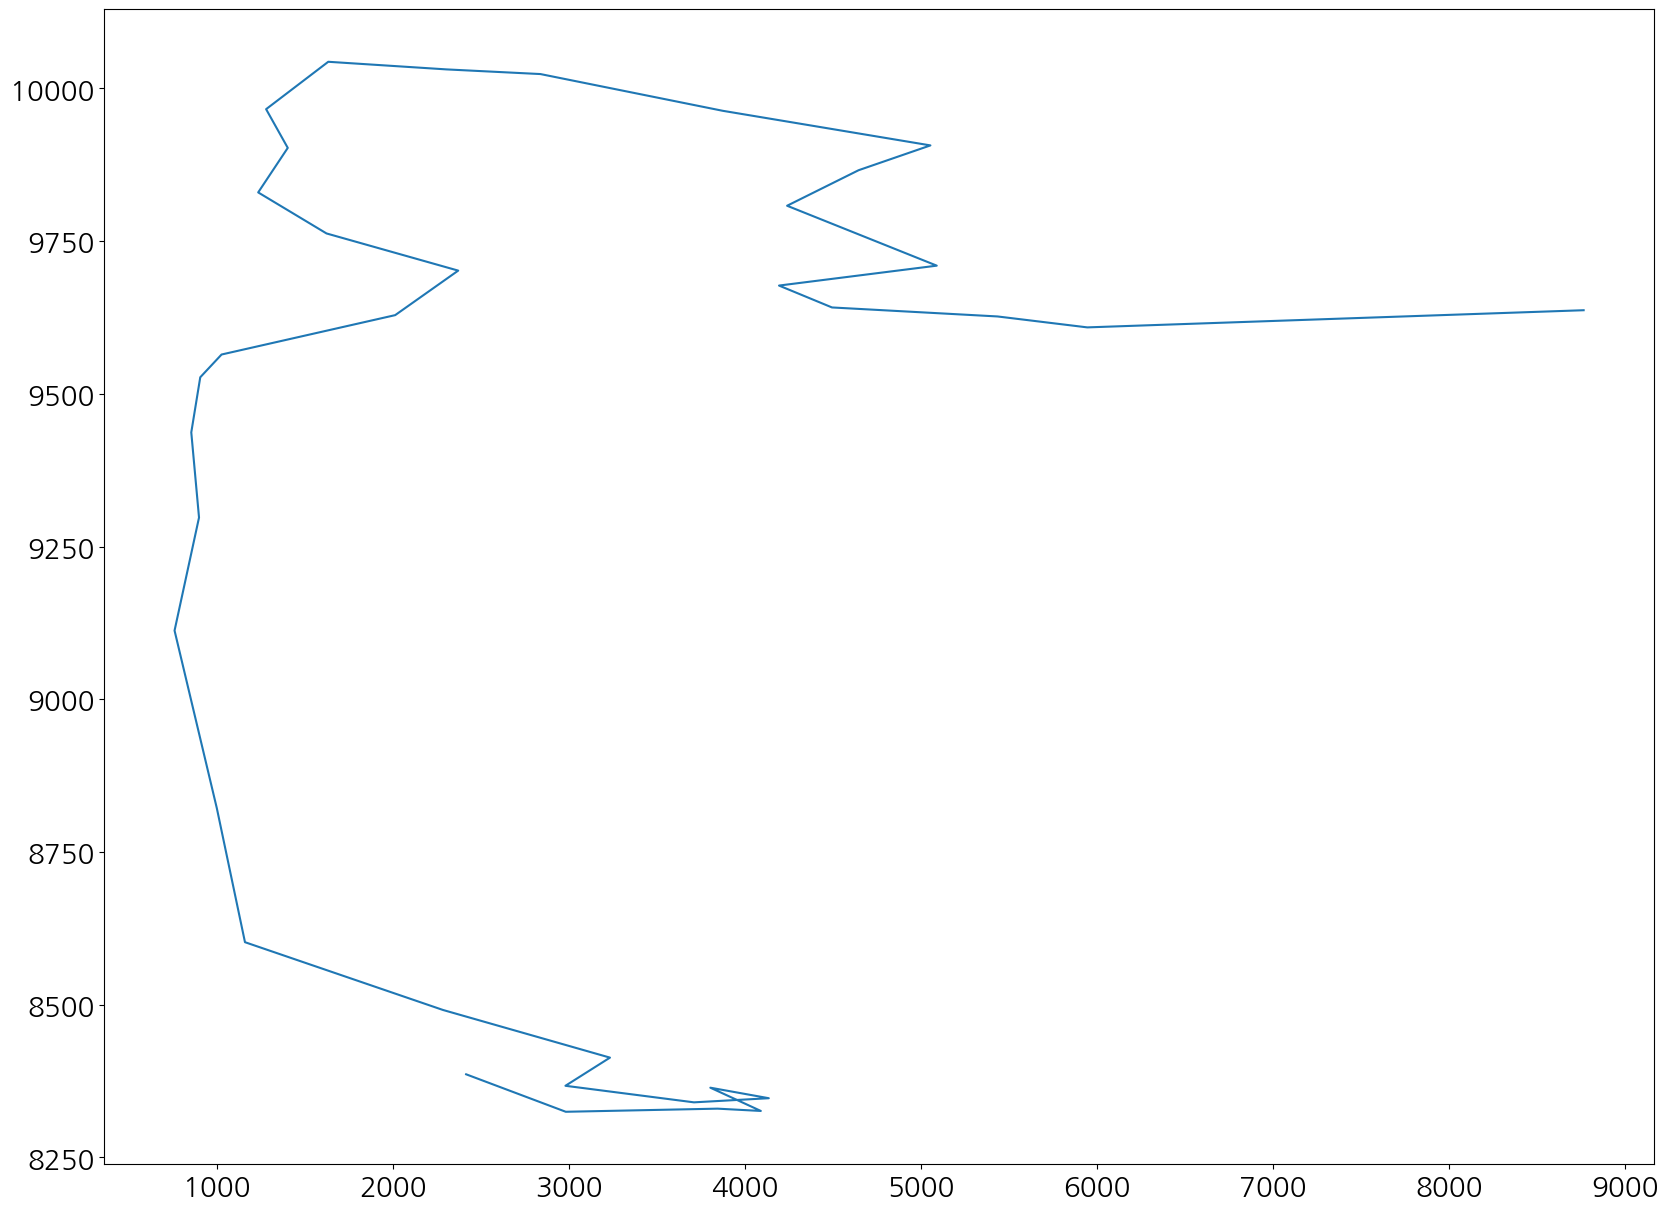

In [67]:
import numpy as np
import matplotlib.pyplot as plt

df_c = df_c.iloc[-36:,:]
x = df_c['서울_거래량']
y = df_c['가격_보정']

plt.plot(x, y)

In [68]:
x_adjusted = df_c['서울_거래량']
y_adjusted = df_c['가격_보정']

In [69]:
x_adjusted

179    8764
180    5945
181    5435
182    4495
183    4194
184    5090
185    4240
186    4646
187    5054
188    3874
189    2839
190    2305
191    1634
192    1281
193    1404
194    1236
195    1624
196    2372
197    2014
198    1028
199     907
200     856
201     900
202     761
203    1001
204    1161
205    2286
206    3234
207    2981
208    3711
209    4136
210    3804
211    4091
212    3845
213    2983
214    2417
Name: 서울_거래량, dtype: int64

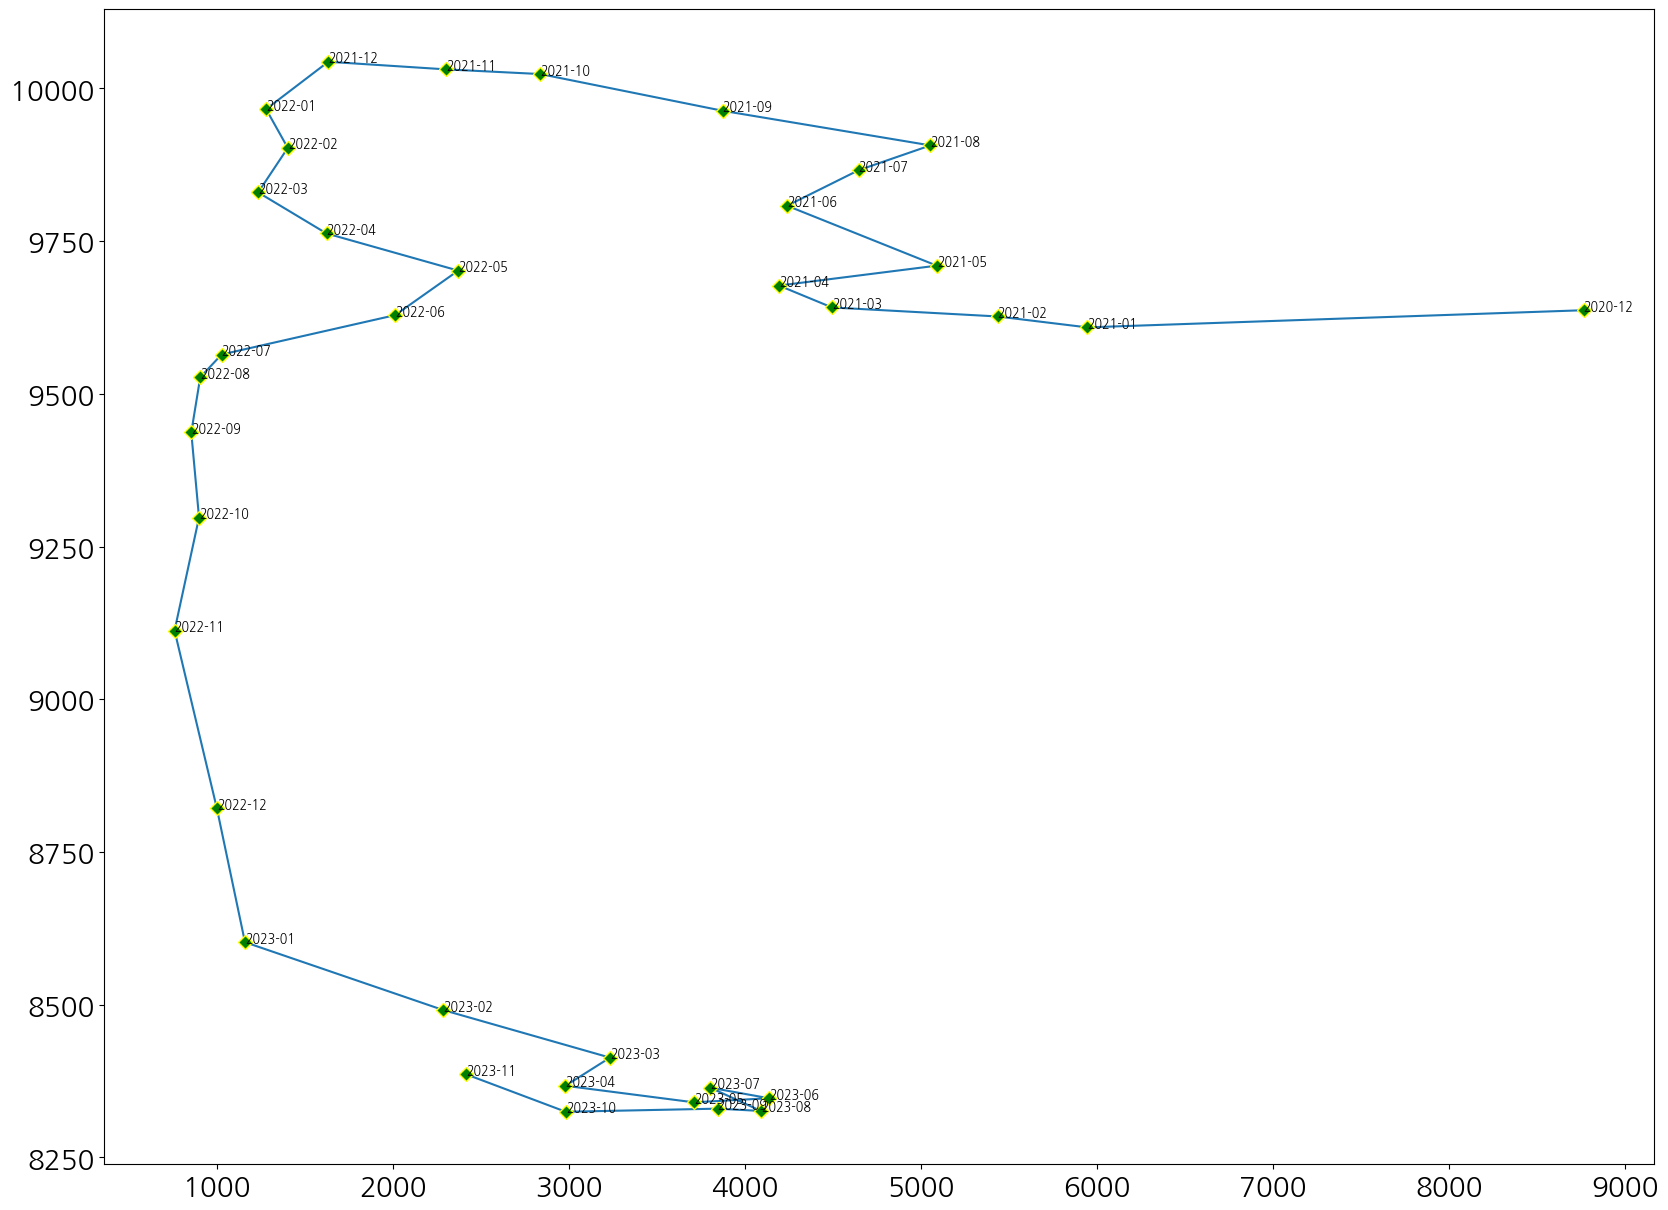

In [74]:
plt.plot(x_adjusted, y_adjusted)


for i,type in enumerate(types):
    x = list(x_adjusted)[i]
    y = list(y_adjusted)[i]
    
    plt.text(x+0.3, y+0.3, type, fontsize=9)
    plt.plot(x, y,marker='D', mfc='green', mec='yellow',ms='7')

plt.show()

## 2023년 1월~ 6월 : 가격정체, 거래량 회복 6단계 → 1단계(가격회복, 거래량 증가)
## 2023년 7월~12월 : 1단계로 회복 하지 못하고 6단계 → 5단계(가격하락,거래량 정체)로 회귀중